<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="fig/cover-small.jpg">
*This notebook contains an excerpt from the [Whirlwind Tour of Python](http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/WhirlwindTourOfPython).*

*The text and code are released under the [CC0](https://github.com/jakevdp/WhirlwindTourOfPython/blob/master/LICENSE) license; see also the companion project, the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook).*


<!--NAVIGATION-->
< [String Manipulation and Regular Expressions](14-Strings-and-Regular-Expressions.ipynb) | [Contents](Index.ipynb) | [Resources for Further Learning](16-Further-Resources.ipynb) >

# A Preview of Data Science Tools

If you would like to spring from here and go farther in using Python for scientific computing or data science, there are a few packages that will make your life much easier.
This section will introduce and preview several of the more important ones, and give you an idea of the types of applications they are designed for.
If you're using the *Anaconda* or *Miniconda* environment suggested at the beginning of this report, you can install the relevant packages with the following command:
```
$ conda install numpy scipy pandas matplotlib scikit-learn
```
Let's take a brief look at each of these in turn.

## NumPy: Numerical Python

NumPy provides an efficient way to store and manipulate multi-dimensional dense arrays in Python.
The important features of NumPy are:

- It provides an ``ndarray`` structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
- It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

In the simplest case, NumPy arrays look a lot like Python lists.
For example, here is an array containing the range of numbers 1 to 9 (compare this with Python's built-in ``range()``):

In [1]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

NumPy's arrays offer both efficient storage of data, as well as efficient element-wise operations on the data.
For example, to square each element of the array, we can apply the "``**``" operator to the array directly:

In [2]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

Compare this with the much more verbose Python-style list comprehension for the same result:

In [3]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional.
For example, here we will reshape our ``x`` array into a 3x3 array:

In [4]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using ``.T``:

In [5]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

or a matrix-vector product using ``np.dot``:

In [6]:
np.dot(M, [5, 6, 7]) # 1×3 matrix（a row vector） multiply a 3×3 matrix

array([ 38,  92, 146])

and even more sophisticated operations like eigenvalue decomposition:

In [7]:
np.linalg.eigvals(M)

array([  1.61168440e+01,  -1.11684397e+00,  -1.30367773e-15])

Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.

For more information on NumPy, see [Resources for Further Learning](16-Further-Resources.ipynb).

## Pandas: Labeled Column-oriented Data

Pandas is a much newer package than NumPy, and is in fact built on top of it.
What Pandas provides is a labeled interface to multi-dimensional data, in the form of a DataFrame object that will feel very familiar to users of R and related languages.
DataFrames in Pandas look something like this:

In [8]:
import pandas as pd
df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})
df

,label,value
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


The Pandas interface allows you to do things like select columns by name:

In [9]:
df['label']

0    A
1    B
2    C
3    A
4    B
5    C
Name: label, dtype: object

Apply string operations across string entries:

In [10]:
df['label'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: label, dtype: object

Apply aggregates across numerical entries:

In [11]:
df['value'].sum()

21

And, perhaps most importantly, do efficient database-style joins and groupings:

In [12]:
df.groupby('label').sum()

,value
label,
A,5
B,7
C,9


Here in one line we have computed the sum of all objects sharing the same label, something that is much more verbose (and much less efficient) using tools provided in Numpy and core Python.

For more information on using Pandas, see [Resources for Further Learning](16-Further-Resources.ipynb).

## Matplotlib MatLab-style scientific visualization

Matplotlib is currently the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

To use Matplotlib, we can start by enabling the notebook mode (for use in the Jupyter notebook) and then importing the package as ``plt``"

In [8]:
# run this if using Jupyter notebook
%matplotlib notebook

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # make graphs in the style of R's ggplot

Now let's create some data (as NumPy arrays, of course) and plot the results:

<IPython.core.display.Javascript object>


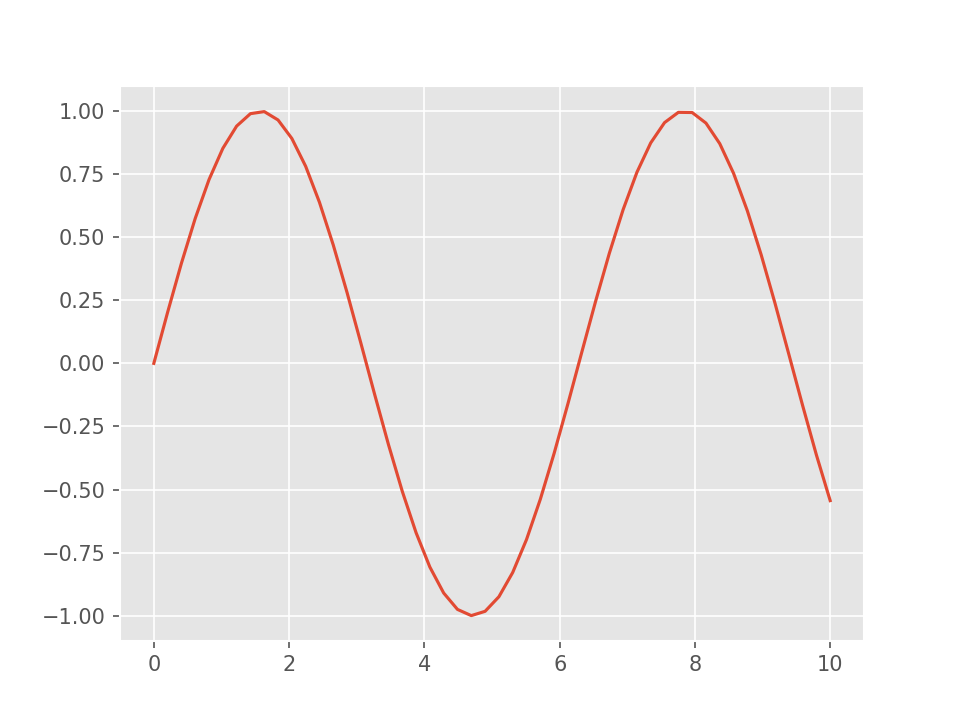

In [10]:
x = np.linspace(0, 10)  # range of values from 0 to 10
y = np.sin(x)           # sine of these values
plt.plot(x, y);         # plot as a line

If you run this code live, you will see an interactive plot that lets you pan, zoom, and scroll to explore the data.

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](http://matplotlib.org/gallery.html) as well as other references listed in [Resources for Further Learning](16-Further-Resources.ipynb).

## SciPy: Scientific Python

SciPy is a collection of scientific functionality that is built on NumPy.
The package began as a set of Python wrappers to well-known Fortran libraries for numerical computing, and has grown from there.
The package is arranged as a set of submodules, each implementing some class of numerical algorithms.
Here is an incomplete sample of some of the more important ones for data science:

- ``scipy.fftpack``: Fast Fourier transforms
- ``scipy.integrate``: Numerical integration
- ``scipy.interpolate``: Numerical interpolation
- ``scipy.linalg``: Linear algebra routines
- ``scipy.optimize``: Numerical optimization of functions
- ``scipy.sparse``: Sparse matrix storage and linear algebra
- ``scipy.stats``: Statistical analysis routines

For example, let's take a look at interpolating a smooth curve between some data

<IPython.core.display.Javascript object>


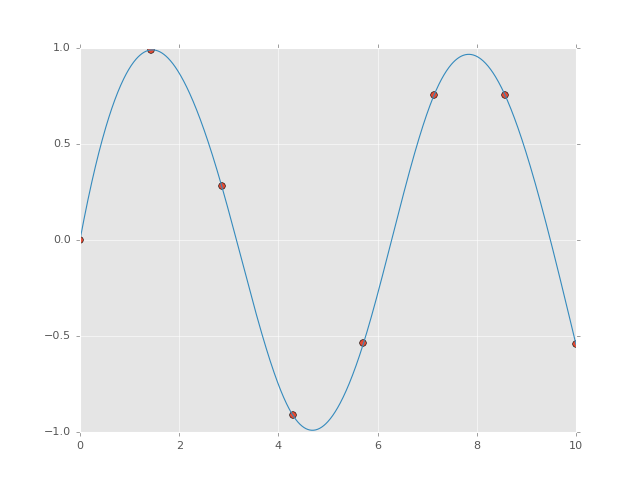

In [16]:
from scipy import interpolate

# choose eight points between 0 and 10
x = np.linspace(0, 10, 8)
y = np.sin(x)

# create a cubic interpolation function
func = interpolate.interp1d(x, y, kind='cubic')

# interpolate on a grid of 1,000 points
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

# plot the results
plt.figure()  # new figure
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp);

What we see is a smooth interpolation between the points.

## Other Data Science Packages

Built on top of these tools are a host of other data science packages, including general tools like [Scikit-Learn](http://scikit-learn.org) for machine learning, [Scikit-Image](http://scikit-image.org) for image analysis, and [Statsmodels](http://statsmodels.sourceforge.net/) for statistical modeling, as well as more domain-specific packages like [AstroPy](http://astropy.org) for astronomy and astrophysics, [NiPy](http://nipy.org/) for neuro-imaging, and many, many more.

No matter what type of scientific, numerical, or statistical problem you are facing, it's likely there is a Python package out there that can help you solve it.

<!--NAVIGATION-->
< [String Manipulation and Regular Expressions](14-Strings-and-Regular-Expressions.ipynb) | [Contents](Index.ipynb) | [Resources for Further Learning](16-Further-Resources.ipynb) >